In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
review_df = pd.read_csv("../data/reviews.csv")

In [52]:
review_df.iloc[97,:]

source_type                                               Person
source_id                                                aecohen
edge_type                                            hasReviewed
target_type                                                 Game
target_id                                                 126163
rating                                                       8.5
comment        This is a great game for those that want very ...
Name: 97, dtype: object

In [68]:
len(review_df['target_id'].unique())

60975

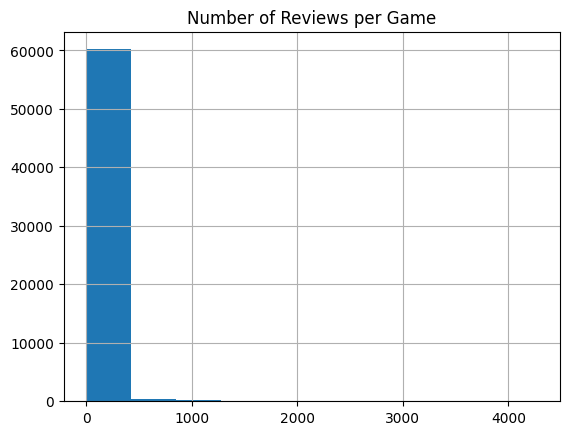

In [73]:
review_df['target_id'].value_counts().hist()
plt.title("Number of Reviews per Game")
plt.show()

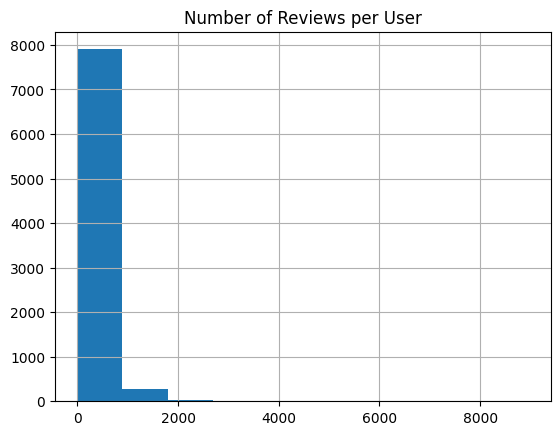

In [69]:
review_df['source_id'].value_counts().hist()
plt.title("Number of Reviews per User")
plt.show()

In [70]:
print(len(review_df))
review_df = review_df.drop_duplicates(subset=["source_id", "target_id"], keep='last')
print(len(review_df))


1876929
1800606


In [65]:
with open("../data/users_to_check.txt", 'w') as f:
    f.write(",".join(list(review_df['source_id'].value_counts()[review_df['source_id'].value_counts() < 100].sort_values(ascending=True).index)))

In [48]:
review_df.to_csv("../data/reviews.csv", index = False)

In [72]:
review_df['source_id'].value_counts()[review_df['source_id'].value_counts() < 2].sort_values(ascending=True).index.unique()

Index(['abdiqanimoh12', 'bdpluer', '418Y', 'aboredgaymer', 'abrahamj',
       'accidentaldesign', 'acookie', 'Adamandkate', 'Bad_Birb', 'Anharva',
       ...
       'Flundi', 'catladymn', 'allmonjoy1', 'amanshu', 'Annoraner', 'aconnor',
       'bcsssj', 'benfrohlich', 'CocoaCrow', 'abbojm02'],
      dtype='object', name='source_id', length=588)

In [30]:
review_df[review_df['source_id']=='dafair']

,source_type,source_id,edge_type,target_type,target_id,rating,comment
886944,Person,dafair,hasReviewed,Game,4282,3.0,Repackaged public domain game.
886945,Person,dafair,hasReviewed,Game,8257,9.0,"Several of the expansions are quite good, and ..."
886946,Person,dafair,hasReviewed,Game,7865,6.0,Game is great for my kids. I like it well enou...
886947,Person,dafair,hasReviewed,Game,22398,6.0,Another Excellent addition to the series. I li...
886948,Person,dafair,hasReviewed,Game,5867,6.0,Game is great for my kids. I like it well enou...
...,...,...,...,...,...,...,...
890917,Person,dafair,hasReviewed,Game,30139,8.0,"Not as necessary as the Petting Zoo Expansion,..."
890918,Person,dafair,hasReviewed,Game,3435,7.0,Fun little game. Reminds one of Duell a bit wh...
890919,Person,dafair,hasReviewed,Game,19998,6.0,NaN
890920,Person,dafair,hasReviewed,Game,181260,6.0,NaN
